In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stc

import os

%load_ext autoreload
%autoreload 2

# run for all cells (OFF LINE)

run 
```
python3 sta_batch.py [DATASET] --tap 8
```

datasets
* 20180618
* 20180621
* 20180626
* 20180828

## load stim and spike data

In [2]:
folder_name = "data"

# dataset_name = "20180618"
# dataset_name = "20180621"
dataset_name = "20180626"
# dataset_name = "20180828"

stim, spike_train, info = pysta.load_data(dataset_name, folder_name)

# channel_names = [ch.replace("ch_","") for ch in info["channel_names"]]   # NOT NEEDED ANYMORE
# info["channel_names"]
# info["cell_types"]


['dataset_name', 'stim', 'spike_train', 'info']
(64, 9000)
(156, 9000)
{'channel_names': ['12a', '12b', '12c', '13a', '13b', '13c', '13d', '13e', '14a', '14b', '14c', '14d', '16a', '16b', '16c', '17a', '17b', '17c', '17d', '21a', '21b', '21c', '21d', '21e', '22a', '22b', '23a', '23b', '23c', '23d', '25a', '25b', '25c', '26a', '26b', '26c', '26d', '27a', '27b', '27c', '27d', '28a', '28b', '28c', '31a', '31b', '31c', '31d', '32a', '32b', '32c', '33a', '33b', '33c', '33d', '35a', '35b', '35c', '35d', '35e', '35f', '35g', '36a', '36b', '36c', '36d', '37a', '37b', '37c', '37d', '37e', '38a', '41a', '41b', '41c', '41d', '42a', '42b', '42c', '43a', '43b', '43c', '45a', '45b', '45c', '46a', '46b', '47a', '48a', '48b', '48c', '48d', '48e', '51a', '51b', '53a', '53b', '53c', '53d', '54a', '54b', '54c', '54d', '56a', '56b', '58a', '61a', '61b', '62a', '62b', '63a', '63b', '63c', '63d', '63e', '64a', '65a', '65b', '65c', '68a', '68b', '71a', '71b', '71c', '72a', '72b', '72c', '72d', '72e', '73a', 

## read some statistics of sta



In [3]:
tap = 8
folder_name = "{}_tap{}_sta".format(dataset_name, tap)
sta_stat = pd.read_csv(os.path.join(folder_name, "stat.csv"))

# subtract center from min,max
sta_stat["min"] -= 0.5
sta_stat["max"] -= 0.5

sta_stat["peak_diff"] = sta_stat["max"] - sta_stat["min"] 

# calc polarity
pos = np.abs(sta_stat["max"])
neg = np.abs(sta_stat["min"])

#sta_result["polarity"] = (pos - neg) / np.sqrt(pos) / np.sqrt(neg)
# sta_result["polarity"] = (pos - neg) / np.minimum(pos, neg)
sta_stat["polarity"] = np.maximum(pos, neg) / np.minimum(pos, neg) * np.sign(pos-neg)

# calc d_prime
sta_stat["PSNR"] = (sta_stat["max"] - sta_stat["min"]) / sta_stat["sigma"]


# add cell type (from PSTH)
sta_stat["cell_type"] = info["cell_types"]
sta_stat.to_csv(os.path.join(folder_name, "stat_more.csv"), index=None)

sta_stat

,channel_name,num_samples,num_spikes,max,max_time_bin,min,min_time_bin,sigma,peak_diff,polarity,PSNR,cell_type
0,12a,2868,4173,0.104361,5,-0.197819,4,0.019981,0.302181,-1.895522,15.123475,ON
1,12b,1123,1239,0.203793,3,-0.286118,5,0.026305,0.489911,-1.403960,18.624368,OFF
2,12c,80,80,0.262500,3,-0.337500,5,0.062627,0.600000,-1.285714,9.580539,OFF
3,13a,6610,8830,0.082220,4,-0.101359,5,0.011100,0.183579,-1.232782,16.538420,OFF
4,13b,648,998,0.222445,3,-0.366733,5,0.034582,0.589178,-1.648649,17.037106,OFF
...,...,...,...,...,...,...,...,...,...,...,...,...
151,86c,526,705,0.203546,5,-0.073050,4,0.027016,0.276596,2.786408,10.238226,ON
152,86d,149,151,0.228477,5,-0.175497,3,0.046548,0.403974,1.301887,8.678597,ON
153,87a,3872,9120,0.216118,4,-0.386513,5,0.027801,0.602632,-1.788432,21.676952,OFF
154,87b,3512,3797,0.244799,5,-0.076508,3,0.019283,0.321306,3.199656,16.662341,ON


In [4]:
print(sta_stat["cell_type"].value_counts())
print(sta_stat["cell_type"].value_counts() / len(sta_stat))

OFF        70
unknown    52
ON         34
Name: cell_type, dtype: int64
OFF        0.448718
unknown    0.333333
ON         0.217949
Name: cell_type, dtype: float64


Text(0, 0.5, 'count')

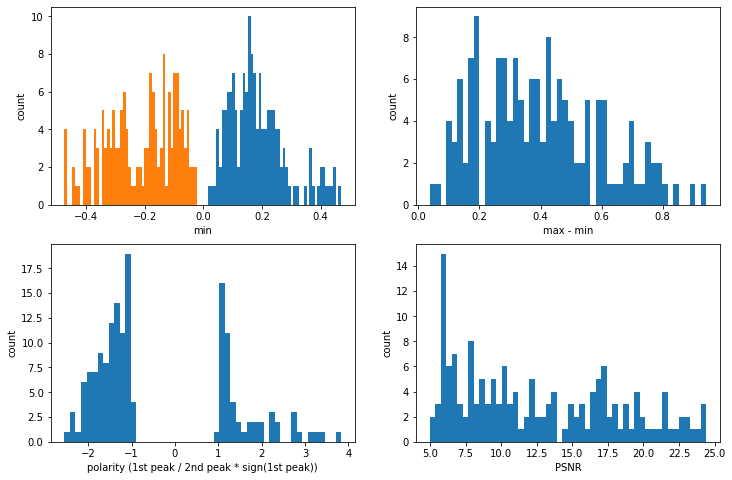

In [5]:
num_bins = 50
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.hist(sta_stat["max"], num_bins)
plt.xlabel("max or min")
plt.ylabel("count")

# plt.subplot(222)
plt.hist(sta_stat["min"], num_bins)
plt.xlabel("min")
plt.ylabel("count")

plt.subplot(222)
plt.hist(sta_stat["max"] - sta_stat["min"], num_bins)
plt.xlabel("max - min")
plt.ylabel("count")


plt.subplot(223)
plt.hist(sta_stat["polarity"], num_bins)
plt.xlabel("polarity (1st peak / 2nd peak * sign(1st peak))")
plt.ylabel("count")

plt.subplot(224)
plt.hist(sta_stat["PSNR"], num_bins)
plt.xlabel("PSNR")
plt.ylabel("count")

-0.8570283775425674


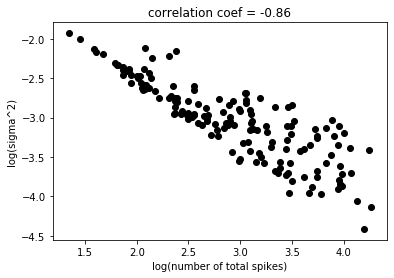

In [6]:
x_data = np.log10(sta_stat["num_spikes"])
y_data = np.log10(sta_stat['sigma']**2)

# correlation coeff
rho = np.corrcoef(x_data, y_data)[0,1]
print(rho)

# plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, marker='o', color='k')
# plt.xlabel('log(number of samples)')
plt.xlabel('log(number of total spikes)')
plt.ylabel('log(sigma^2)')

plt.title('correlation coef = {:.2f}'.format(rho))

plt.savefig("figure/{}_n_vs_sig.pdf".format(dataset_name))
plt.savefig("figure/{}_n_vs_sig.png".format(dataset_name))

[-0.59788721 -1.30147397]
[[ 0.00083907 -0.00244288]
 [-0.00244288  0.00752684]]


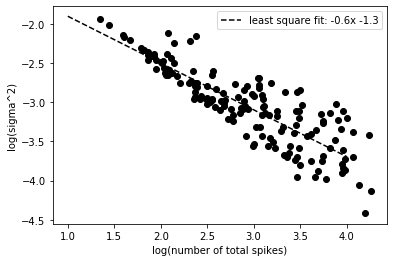

In [7]:
# fit to ax + b
# plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, marker='o', color='k')
# plt.xlabel('log(number of samples)')
plt.xlabel('log(number of total spikes)')
plt.ylabel('log(sigma^2)')

from scipy import optimize

def fit_func(x, a, b):
    return a * x + b

params, params_covariance = optimize.curve_fit(fit_func, x_data, y_data,
                                               p0=[-1, 0])

# def fit_func(x, b):
#     return -1 * x + b
# params, params_covariance = optimize.curve_fit(fit_func, x_data, y_data,
#                                                p0=[0])
print(params)
print(params_covariance)

x = np.linspace(1,4, 40)
plt.plot(x, fit_func(x, *params), 'k--', label='least square fit: {:.1f}x {:.1f}'.format(*params))
# plt.plot(x, fit_func(x, *params), 'k--', label='least square fit: -x {:.1f}'.format(*params))

plt.legend()

plt.savefig("figure/{}_n_vs_sig_fit.pdf".format(dataset_name))
plt.savefig("figure/{}_n_vs_sig_fit.png".format(dataset_name))

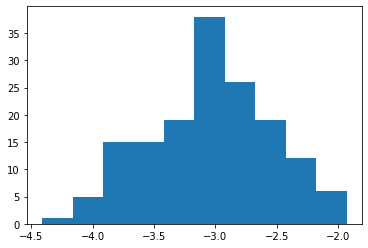

In [8]:
# select x by quantizing sigma and take minimum of x
# y_bins = np.linspace(-2.3, -0.8, 30)
# plt.hist(y_data, y_bins)
y_bins = np.linspace(-4.5, -1.5, 30)
plt.hist(y_data)

# fit selected samples to a x + b
x_selected = list()
y_selected = list()
idx_selected = list()

for i in range(len(y_bins)-1):
    idx = np.logical_and(y_data >= y_bins[i], y_data < y_bins[i+1])
    cnt = np.sum(idx)
    
    if cnt >0:
        xs = np.array(x_data[idx])
        ys = np.array(y_data[idx])

        # take min of x
        min_x = np.min(xs)        
        arg_min_x = np.argmin(xs)
        
        x_selected.append(min_x)
        y_selected.append(ys[arg_min_x])        
#         print(np.where(idx)[0], arg_min_x)
        idx_selected.append(np.where(idx)[0][arg_min_x])

x_selected = np.array(x_selected)
y_selected = np.array(y_selected)

In [9]:
sta_stat_selected = sta_stat.loc[idx_selected,:]
sta_stat_not_selected = sta_stat[~sta_stat.index.isin(sta_stat_selected.index)]
print(len(sta_stat_selected), len(sta_stat_not_selected), len(sta_stat))

selected_channel_names = sta_stat_selected["channel_name"]
print(selected_channel_names) # ordered by num_samples

not_selected_channel_names = sta_stat_not_selected["channel_name"]
print(not_selected_channel_names) # ordered by num_samples

23 133 156
76     42a
121    71a
62     36a
104    56b
42     28b
107    61b
150    86b
50     32c
138    76b
69     37d
139    76c
119    68a
90     48c
118    65c
97     53c
75     41d
61     35g
60     35f
70     37e
53     33c
128    72e
21     21c
74     41c
Name: channel_name, dtype: object
0      12a
1      12b
2      12c
3      13a
4      13b
      ... 
151    86c
152    86d
153    87a
154    87b
155    87c
Name: channel_name, Length: 133, dtype: object


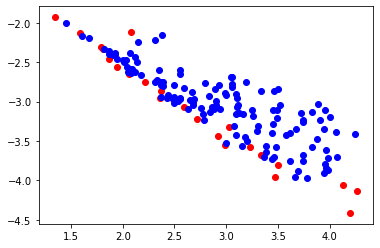

In [10]:
# just for sanity-check 
plt.scatter(np.log10(sta_stat_selected["num_spikes"]), np.log10(sta_stat_selected['sigma']**2), color='r')
plt.scatter(np.log10(sta_stat_not_selected["num_spikes"]), np.log10(sta_stat_not_selected['sigma']**2), color='b')

# plt.scatter(np.log10(sta_stat_selected["num_samples"]), np.log10(sta_stat_selected['sigma']**2), color='r')
# plt.scatter(np.log10(sta_stat_not_selected["num_samples"]), np.log10(sta_stat_not_selected['sigma']**2), color='b')

# must match with the figure below

-0.9765745265407287


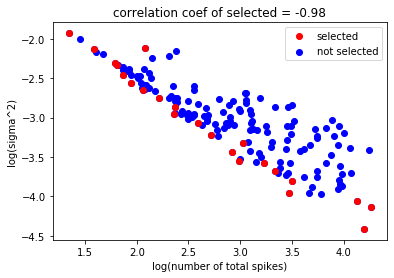

In [11]:
# cross correlation
rho_selected = np.corrcoef(x_selected, y_selected)[0,1]
print(rho_selected)

plt.scatter(x_data, y_data, color='b', label='not selected')
plt.plot(x_selected, y_selected, 'ro', label='selected')
plt.legend()

plt.xlabel('log(number of total spikes)')
# plt.xlabel('log(number of samples)')
plt.ylabel('log(sigma^2)')

plt.title('correlation coef of selected = {:.2f}'.format(rho_selected))



plt.savefig("figure/{}_n_vs_sig_selected.pdf".format(dataset_name))
plt.savefig("figure/{}_n_vs_sig_selected.png".format(dataset_name))

[-0.82253884 -0.88995611]
[[ 0.00156417 -0.00420272]
 [-0.00420272  0.01238997]]


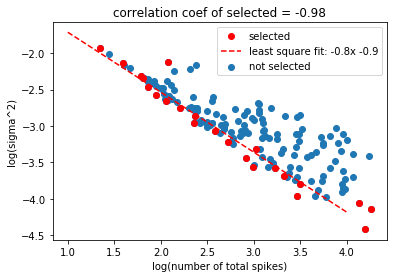

In [12]:
# fit selected samples to ax+b
def fit_func(x, a, b):
    return a * x + b

params, params_covariance = optimize.curve_fit(fit_func, x_selected, y_selected,
                                               p0=[-1, 0])
# def fit_func(x, b):
#     return - x + b

# params, params_covariance = optimize.curve_fit(fit_func, x_selected, y_selected,
#                                                p0=[0])

print(params)
print(params_covariance)


# plt.figure(figsize=(8,6))
plt.scatter(x_data, y_data, label='not selected')
plt.plot(x_selected, y_selected, 'ro', label='selected')

x = np.linspace(1,4, 40)
plt.plot(x, fit_func(x, *params), 'r--', label='least square fit: {:.1f}x {:.1f}'.format(*params))

plt.xlabel('log(number of total spikes)')
# plt.xlabel('log(number of samples)')
plt.ylabel('log(sigma^2)')
plt.legend()


plt.title('correlation coef of selected = {:.2f}'.format(rho_selected))

plt.savefig("figure/{}_n_vs_sig_fit_selected.pdf".format(dataset_name))
plt.savefig("figure/{}_n_vs_sig_fit_selected.png".format(dataset_name))

## plot for each cell type

In [13]:
# helper function to plot histograms of a column by cell_type
def plot_histogram_by_cell_type(clusters, col_name, alpha=0.5, separate_figure=False, XLIM=None):
    if separate_figure:
        plt.figure()
        
    idx_on = clusters["cell_type"] == "ON"
    clusters.loc[idx_on, col_name].hist(alpha=alpha, color='r')
    
    if XLIM is not None:
        plt.xlim(XLIM)
    
    if separate_figure:
        plt.xlabel(col_name + " (ON)")
        plt.ylabel("count")
        plt.show()

        
    if separate_figure:
        plt.figure()

    idx_on = clusters["cell_type"] == "OFF"
    clusters.loc[idx_on, col_name].hist(alpha=alpha, color='b')
    
    if XLIM is not None:
        plt.xlim(XLIM)

    if separate_figure:
        plt.xlabel(col_name + " (OFF)")
        plt.ylabel("count")
        plt.show()
    
    
    if separate_figure:
        plt.figure()
        
    idx_unknown = clusters["cell_type"] == "unknown"
    clusters.loc[idx_unknown, col_name].hist(alpha=alpha, color='k')
    
    if XLIM is not None:
        plt.xlim(XLIM)

    if separate_figure:
        plt.xlabel(col_name + " (unknown)")
        plt.ylabel("count")
        plt.show()
    else: # plot once
        plt.xlabel(col_name)
        plt.ylabel("count")
        plt.legend(["ON", "OFF", "unknown"])

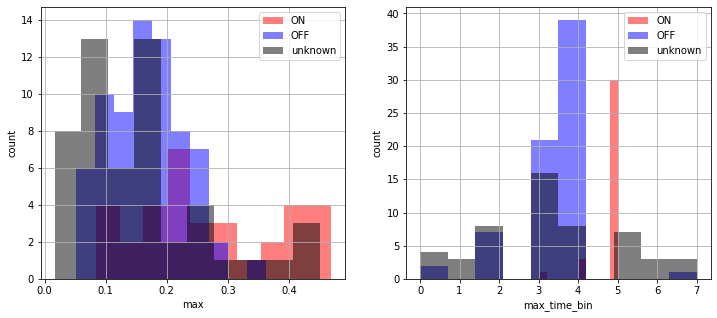

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_histogram_by_cell_type(sta_stat, "max")
plt.subplot(122)
plot_histogram_by_cell_type(sta_stat, "max_time_bin")

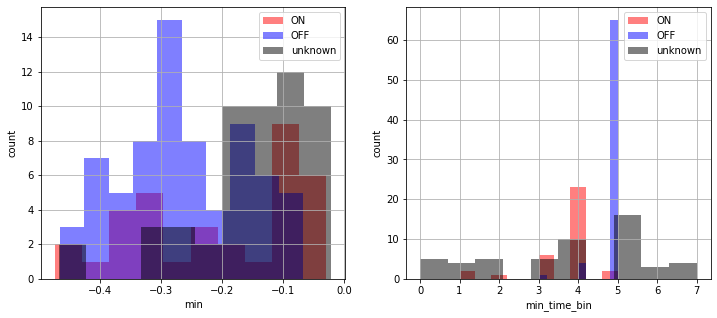

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plot_histogram_by_cell_type(sta_stat, "min")
plt.subplot(122)
plot_histogram_by_cell_type(sta_stat, "min_time_bin")

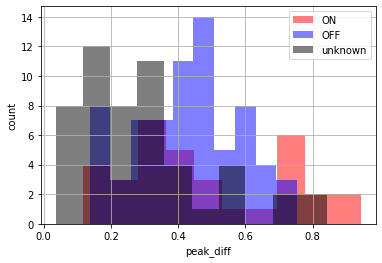

In [16]:
plot_histogram_by_cell_type(sta_stat, "peak_diff")

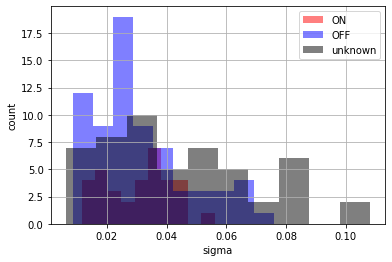

In [17]:
plot_histogram_by_cell_type(sta_stat, "sigma")

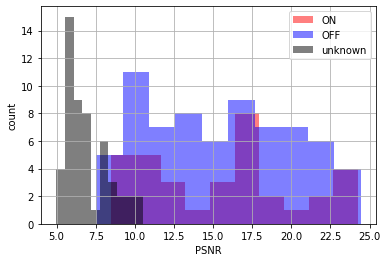

In [18]:
plot_histogram_by_cell_type(sta_stat, "PSNR")

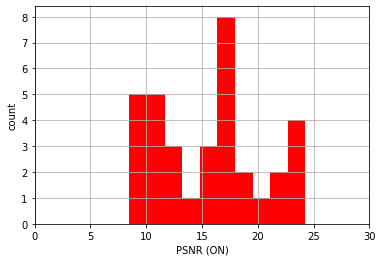

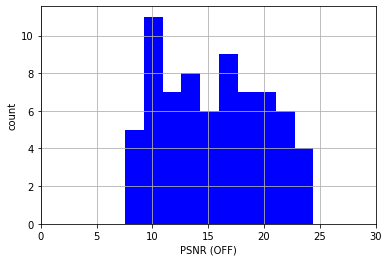

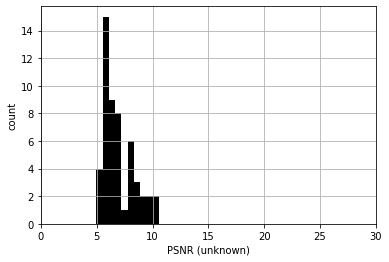

In [19]:
plot_histogram_by_cell_type(sta_stat, "PSNR", alpha=1, separate_figure=True, XLIM=[0,30])

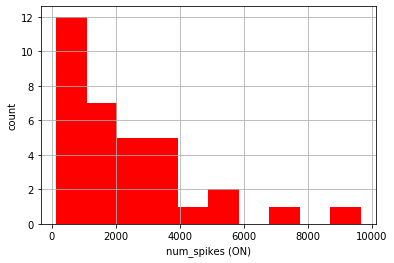

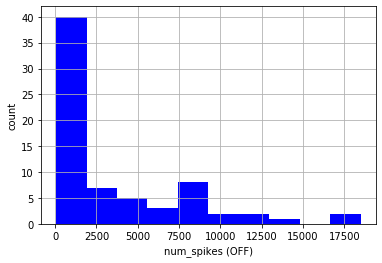

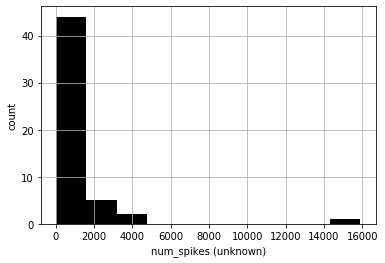

In [20]:
plot_histogram_by_cell_type(sta_stat, "num_spikes", alpha=1, separate_figure=True)

Text(0, 0.5, 'number of spikes')

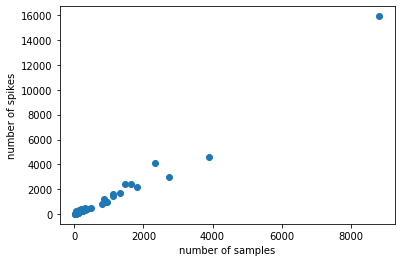

In [21]:
idx_unknown = sta_stat["cell_type"]=="unknown"
sta_stat_unknown = sta_stat.loc[idx_unknown]

plt.scatter(sta_stat_unknown["num_samples"], sta_stat_unknown["num_spikes"])
plt.xlabel('number of samples')
plt.ylabel('number of spikes')

## plot some examples

,channel_name,num_samples,num_spikes,max,max_time_bin,min,min_time_bin,sigma,peak_diff,polarity,PSNR,cell_type
25,22b,1649,2413,0.052839,3,-0.041649,6,0.015075,0.094488,1.268657,6.267735,unknown


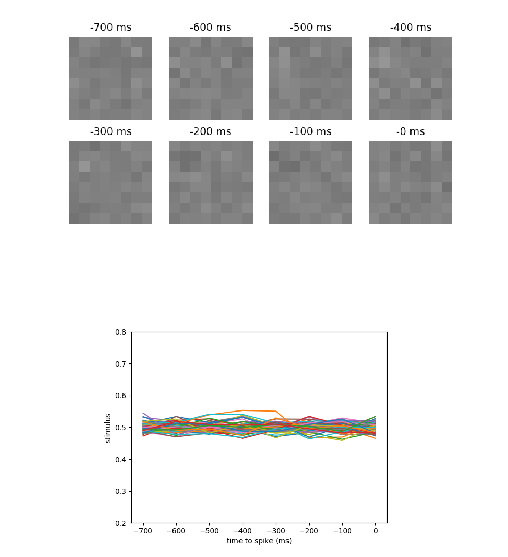

In [24]:

# channel_name = "58c"
# channel_name = "58d"
# channel_name = "74a"

#channel_name = "14b"
channel_name = "22b"
# channel_name = "36c"
#channel_name = "87b"

plt.figure(figsize=(12,10))

plt.subplot(211)
plt.imshow(plt.imread("{}_tap8_sta/{}_sta.png".format(dataset_name, channel_name)))
plt.axis("off")

plt.subplot(212)
plt.imshow(plt.imread("{}_tap8_sta/{}_sta_temp.png".format(dataset_name, channel_name)))
plt.axis("off")

idx = sta_stat["channel_name"] == channel_name
sta_stat.loc[idx,:]

## further analysis